In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [ ]:
iris = load_iris()

iris_data,iris_label = iris.data,iris.target

print(iris_label,iris.target_names)

iris_df = pd.DataFrame(data=iris_data,columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(iris_data,iris_label,test_size=0.2,random_state=42)
estimator = DecisionTreeClassifier(random_state=42)
estimator.fit(x_train,y_train)
print(estimator.score(x_test,y_test))

1.0


In [ ]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

keys = iris_data.keys()
print(keys)
print('feature_names :',type(iris_data.feature_names),len(iris_data.feature_names),iris_data.feature_names[:2])
print('target_names :',type(iris_data.target_names),len(iris_data.target_names),iris_data.target_names[:2])
print('data :',type(iris_data.data),len(iris_data.data),iris_data.data[:2])
print('target :',type(iris_data.target),len(iris_data.target),iris_data.target[:2])

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
feature_names : <class 'list'> 4 ['sepal length (cm)', 'sepal width (cm)']
target_names : <class 'numpy.ndarray'> 3 ['setosa' 'versicolor']
data : <class 'numpy.ndarray'> 150 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]]
target : <class 'numpy.ndarray'> 150 [0 0]


In [ ]:
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.metrics import accuracy_score as acs
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import KFold
import numpy as np

estimator = dt(random_state=42)
iris_data = load_iris()

x_train,x_test,y_train,y_test = tts(iris_data.data,iris_data.target,test_size=0.3,random_state=42)

kfold = KFold(n_splits=5)
cv_acc = []
n_iter = 0

features = iris_data.data
label = iris_data.target

for train_idx, test_idx in kfold.split(features) :
  x_train,x_test = features[train_idx],features[test_idx]
  y_train,y_test = label[train_idx],label[test_idx]

  estimator.fit(x_train,y_train)
  pred = estimator.predict(x_test)
  n_iter += 1

  cv_acc.append(np.round(acs(y_test,pred),4))
  print(cv_acc[-1])

print(np.mean(cv_acc),np.min(cv_acc),np.max(cv_acc))

1.0
1.0
0.8333
0.9333
0.8
0.91332 0.8 1.0


In [ ]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data = iris.data,columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [ ]:
kfold = KFold(n_splits=3)
n_iter = 0
for train,test in kfold.split(iris_df) :
  n_iter += 1
  x_train,x_test = iris_df['label'].iloc[train],iris_df['label'].iloc[test]
  print(x_train.value_counts(),x_test.value_counts())

1    50
2    50
Name: label, dtype: int64 0    50
Name: label, dtype: int64
0    50
2    50
Name: label, dtype: int64 1    50
Name: label, dtype: int64
0    50
1    50
Name: label, dtype: int64 2    50
Name: label, dtype: int64


In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits = 3)

for train,test in skf.split(iris_df,iris_df['label']) :
  n_iter += 1
  x_train,x_test = iris_df['label'].iloc[train],iris_df['label'].iloc[test]
  print(x_train.value_counts(),x_test.value_counts())


2    34
0    33
1    33
Name: label, dtype: int64 0    17
1    17
2    16
Name: label, dtype: int64
1    34
0    33
2    33
Name: label, dtype: int64 0    17
2    17
1    16
Name: label, dtype: int64
0    34
1    33
2    33
Name: label, dtype: int64 1    17
2    17
0    16
Name: label, dtype: int64


In [ ]:
from sklearn.model_selection import StratifiedKFold

estimator = dt(random_state=42)
iris_data = load_iris()

x_train,x_test,y_train,y_test = tts(iris_data.data,iris_data.target,test_size=0.3,random_state=42)

kfold = KFold(n_splits=5)
cv_acc = []
n_iter = 0

features = iris_data.data
label = iris_data.target

for train_idx, test_idx in skf.split(features, label) :
  x_train,x_test = features[train_idx],features[test_idx]
  y_train,y_test = label[train_idx],label[test_idx]

  estimator.fit(x_train,y_train)
  pred = estimator.predict(x_test)
  n_iter += 1

  cv_acc.append(np.round(acs(y_test,pred),4))
  print(cv_acc[-1])

print(np.mean(cv_acc),np.min(cv_acc),np.max(cv_acc))

0.98
0.94
0.96
0.96 0.94 0.98


In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

estimator = dt(random_state=42)
iris_data = load_iris()

features = iris_data.data
label = iris_data.target
score = cross_val_score(estimator,features,label,scoring='accuracy',cv=3)
print(score,np.mean(score))

[0.98 0.94 0.96] 0.96


In [ ]:
from sklearn.model_selection import GridSearchCV

iris_data = load_iris()
x_train,x_test,y_train,y_test = tts(iris_data.data,iris_data.target,test_size=0.3,random_state=42)
estimator = dt(random_state=42)
grid_parameters = {
    'max_depth' : [1,2,3],
    'min_samples_split':[2,3],    
}

grid_dt = GridSearchCV(estimator,grid_parameters,cv=3,refit=True)
grid_dt.fit(x_train,y_train)

scores_df = pd.DataFrame(grid_dt.cv_results_)
scores_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.619048,5,0.628571,0.571429,0.657143
1,"{'max_depth': 1, 'min_samples_split': 3}",0.619048,5,0.628571,0.571429,0.657143
2,"{'max_depth': 2, 'min_samples_split': 2}",0.904762,3,0.914286,0.857143,0.942857
3,"{'max_depth': 2, 'min_samples_split': 3}",0.904762,3,0.914286,0.857143,0.942857
4,"{'max_depth': 3, 'min_samples_split': 2}",0.923810,1,0.942857,0.885714,0.942857
5,"{'max_depth': 3, 'min_samples_split': 3}",0.923810,1,0.942857,0.885714,0.942857


In [ ]:
print(grid_dt.best_params_)
print(grid_dt.best_score_)

{'max_depth': 3, 'min_samples_split': 2}
0.9238095238095237


In [7]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print(labels,encoder.classes_)

[0 1 4 5 3 3 2 2] ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [8]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 2차원 ndarray로 변환합니다. 
items = np.array(items).reshape(-1, 1)

# 원-핫 인코딩을 적용합니다. 
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

# OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray()를 이용해 밀집 행렬로 변환. 
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [9]:
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서'] })
pd.get_dummies(df) #바로 변환가능

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [10]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환합니다. 
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print(iris_df.mean(),iris_df.var())

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64 sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print(iris_df_scaled.min(),iris_df_scaled.max())

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64 sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print(iris_df_scaled.min(),iris_df_scaled.max())

sepal length (cm)   -1.870024
sepal width (cm)    -2.433947
petal length (cm)   -1.567576
petal width (cm)    -1.447076
dtype: float64 sepal length (cm)    2.492019
sepal width (cm)     3.090775
petal length (cm)    1.785832
petal width (cm)     1.712096
dtype: float64


In [17]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
a = np.arange(0, 11).reshape(-1, 1)
b =  np.arange(0, 6).reshape(-1, 1)

scaler = MinMaxScaler()
scaler.fit(a)
scale_a = scaler.transform(a).flatten()
scale_b = scaler.transform(b).flatten()
print(scale_a,scale_b)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] [0.  0.1 0.2 0.3 0.4 0.5]


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('/content/titanic_train.csv')
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


In [33]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

0    NaN
1      C
2    NaN
Name: Cabin, dtype: object


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Pclass', ylabel='Survived'>

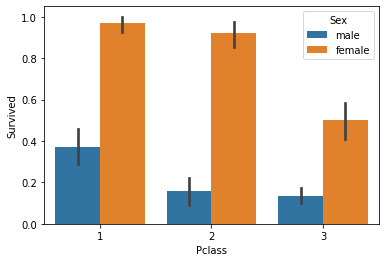

In [34]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

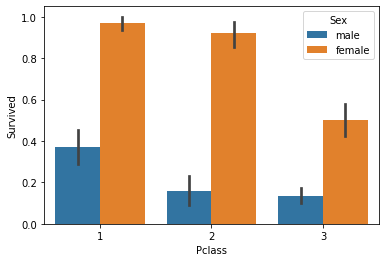

In [31]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

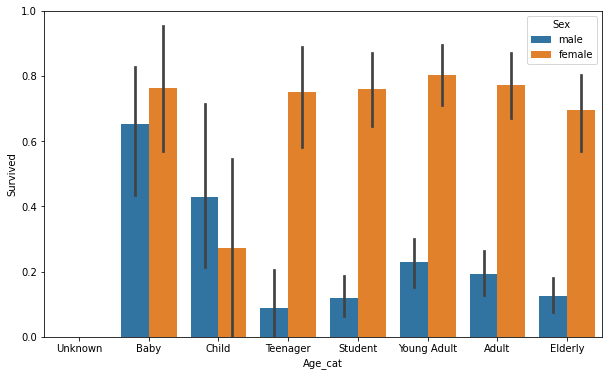

In [35]:
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [36]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,8,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,8,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,8,2


In [39]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df
    
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [40]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))


DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8659


In [45]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(dt_clf , folds=5) 


교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [47]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))
print('박동진 2주차')

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
박동진 2주차
